# **Frozen Lake using SARSA Algorithm**

Frozen lake involves crossing a frozen lake from Start(S) to Goal(G) without falling into any Holes(H) by walking over the Frozen(F) lake. The agent may not always move in the intended direction due to the slippery nature of the frozen lake.

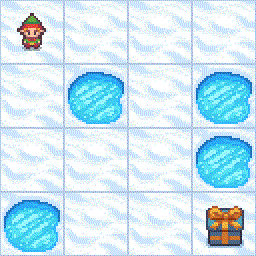

# **Rewards:**

Reach goal(G): +1

Reach hole(H): 0

Reach frozen(F): 0

In [ ]:
import random
import gym
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#defines the layout of the FrozenLake environment
'''"S" represents the starting point.
"F" represents a frozen surface where the agent can walk.
"H" represents a hole where the agent will fall through.
"G" represents the goal.'''
de=["SFFF", "FHFH", "FFFH", "HFFG"]


env=gym.make('FrozenLake-v1',new_step_api=True)
print("Action space:", env.action_space) #0: Left 1: Down 2: Right 3: Up
print(env.observation_space)

Action space: Discrete(4)
Discrete(16)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
state_size = 16 #number of states in the environment.
action_space = env.action_space.n #the number of actions
alpha = 0.1 #learning rate of the algorithm - how much the agent updates its estimates of state-action values based on new information
gamma = 1 #discount factor - the importance of future rewards in the agent's decision-making process - future rewards equally as important as immediate rewards
state_action_vals = np.random.randn(state_size, action_space) #Q-values for each state-action pair with random values drawn from a standard normal distribution - expected cumulative rewards
policy = np.zeros(state_size, dtype=int) #agent's behavior or strategy in terms of which action to take in each state
episodes = 10000
eps = 0.2 #probability of exploration
test_episodes = 500
test_every = 1000
test_episode = []
rewards = []

In [ ]:
def select_action(state, eps):
  sample = np.random.uniform()  #random number is used to decide whether the agent should explore or exploit between 0 and 1
  if sample < eps:
    return env.action_space.sample() #the agent chooses to explore - returns a randomly selected action from the action space
  else:
    return state_action_vals[state].argmax() #exploit - find the index of the action with the maximum Q-value in the array

In [ ]:
act_dict={0:'Left',1:'Down', 2:"Right", 3:"Up"}
for ep in range(episodes):
  state = env.reset()
  action = select_action(state, eps) #selects the initial action for the agent using the epsilon-greedy policy
  done = False  # the episode hasn't ended yet

  while not done:
    next_state, reward, done, __= env.step(action)[0],env.step(action)[1],env.step(action)[2],env.step(action)[3]
    next_action = select_action(state, eps)
    action_value = state_action_vals[state, action]
    next_action_value = state_action_vals[next_state, next_action]
    delta = reward + gamma * next_action_value - action_value #calculates the temporal difference error - difference between the current estimate of the Q-value and the updated estimate
    state_action_vals[state, action] += alpha * delta #updates the Q-value for the current state-action pair using the temporal difference error and the learning rate
    state, action = next_state, next_action
  if ep % test_every == 0: #checks if it's time to evaluate the agent's performance on the test episodes
    total_rewards = 0
    for _ in range(test_episodes):
      done = False
      state = env.reset()

      while not done:
        action = state_action_vals[state].argmax()
        state, reward, done, _ = env.step(action)[0],env.step(action)[1],env.step(action)[2],env.step(action)[3]
        total_rewards += reward
        print(f"State: {state} \t Action:{act_dict[action]}")
    rewards.append(total_rewards / episodes)
    test_episode.append(ep)

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Streaming output truncated to the last 5000 lines.
State: 0 	 Action:Left
State: 4 	 Action:Left
State: 8 	 Action:Left
State: 0 	 Action:Left
State: 4 	 Action:Left
State: 4 	 Action:Left
State: 0 	 Action:Left
State: 0 	 Action:Left
State: 0 	 Action:Left
State: 0 	 Action:Left
State: 8 	 Action:Left
State: 12 	 Action:Down
State: 4 	 Action:Left
State: 12 	 Action:Left
State: 0 	 Action:Left
State: 12 	 Action:Left
State: 0 	 Action:Left
State: 0 	 Action:Left
State: 8 	 Action:Left
State: 0 	 Action:Left
State: 0 	 Action:Left
State: 12 	 Action:Left
State: 4 	 Action:Left
State: 12 	 Action:Left
State: 0 	 Action:Left
State: 0 	 Action:Left
State: 8 	 Action:Left
State: 4 	 Action:Down
State: 8 	 Action:Left
State: 12 	 Action:Down
State: 4 	 Action:Left
State: 0 	 Action:Left
State: 0 	 Action:Left
State: 4 	 Action:Left
State: 12 	 Action:Left
State: 4 	 Action:Left
State: 0 	 Action:Left
State: 0 	 Action:Left
State: 0 	 Action:Left
State: 8 	 Action:Left
State: 9 	 Action:Down

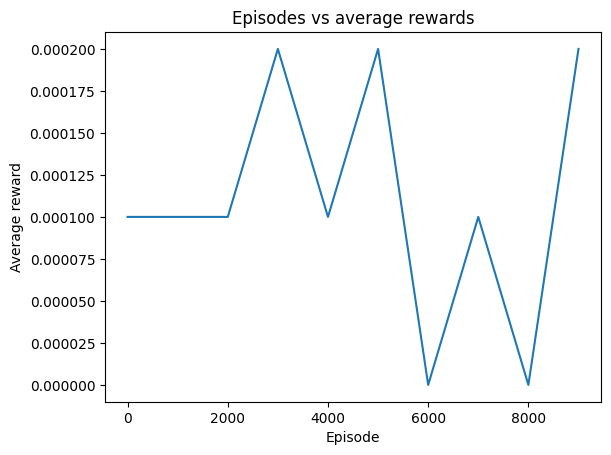

In [ ]:
fig, ax = plt.subplots()
ax.plot(test_episode, rewards)
ax.set_title('Episodes vs average rewards')
ax.set_xlabel('Episode')
_ = ax.set_ylabel('Average reward')